# LIBRARIES

IMPORTING IMPORTANT LIBRARIES


1.   numpy- python library that work on multidimensional array

2.   pandas- python library that work on data frame type of data

3. matplotlib- python library that helps to plot diffrent diagram and graph



In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LIB FOR DATA VISUALISATION

In [134]:
!pip install seaborn
import seaborn as sns

# DATA EXTRACTING
***downloading*** the data,saved in drive whose path is
"/comp1804_coursework_dataset_23-24.csv"

In [135]:
data=pd.read_csv("/content/comp1804_coursework_dataset_23-24.csv")

# 1. DATA EXPLORATION


## 1.1 BASIC INFORMATION


1.   columns
2.   info



In [136]:
print(data.columns)

Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')


In [137]:
print("BASIC INFORMATION OF DATASET:-\n",)
data.info()

BASIC INFORMATION OF DATASET:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9347 entries, 0 to 9346
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9347 non-null   int64  
 1   paragraph           9347 non-null   object 
 2   has_entity          9347 non-null   object 
 3   lexicon_count       9347 non-null   int64  
 4   difficult_words     9329 non-null   float64
 5   last_editor_gender  9347 non-null   object 
 6   category            9286 non-null   object 
 7   text_clarity        9 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 584.3+ KB



1. Unique identifier: par_id

2. paragraph :Text to classify

3. Numerical Features:
lexicon_count(Discrete), difficult_words (Discrete)

4. Categorical Features:
has_entity,last_editor_gender,category,text_clarity

What are the data types for each feature?
1. strings or mixed data types
paragraph             
as_entity             
last_editor_gender     
category              
text_clarity  


2. lexicon_count        int64
3. difficult_words       float64

Now that we have an idea of what kinds of features we're working with, we can see how much information we have about each of them.

## 1.2 SET INDEX as par_id

In [138]:

data = data.set_index('par_id')

# Verify the change
print(data.head(1))

                                                      paragraph  \
par_id                                                            
428209002237  Ramsay was born in Glasgow on 2 October 1852. ...   

                                  has_entity  lexicon_count  difficult_words  \
par_id                                                                         
428209002237  ORG_YES_PRODUCT_NO_PERSON_YES_             49             12.0   

             last_editor_gender     category  text_clarity  
par_id                                                      
428209002237                man  biographies  clear_enough  


## 1.3 SHOW SOME DATA


In [139]:
data.head(2)

,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
par_id,,,,,,,
428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough


## 1.4 DATA DESCRIBE

In [140]:
data.describe(include="all")

,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
count,9347,9347,9347.000000,9329.000000,9347,9286,9
unique,8992,9,NaN,NaN,4,10,2
top,-1,ORG_YES_PRODUCT_NO_PERSON_YES_,NaN,NaN,man,biographies,clear_enough
freq,42,3060,NaN,NaN,6244,2942,5
mean,NaN,NaN,81.981277,21.514203,NaN,NaN,NaN
std,NaN,NaN,63.533532,16.307358,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,33.000000,9.000000,NaN,NaN,NaN
50%,NaN,NaN,64.000000,17.000000,NaN,NaN,NaN
75%,NaN,NaN,117.000000,30.000000,NaN,NaN,NaN



##**OBSERVATIONS**:

1. There are a total of 9347 passengers in our data set.
2. The difficult_words is missing approximately  18 values.
3. The category and text_clarity both features have some missing values. both features are important to predict categiry and text_clarity so we will not eliminate these columns.
4. The last_editor_gender feature has 4 unique values, we need to find 4rth category.

## 1.5 DUPLICATES

In [141]:
duplicates_rows=data.duplicated()
print(duplicates_rows.sum())

249


## 1.6 MISSING VALUES

In [142]:
# Find all missing values in columns
missing_values = data.isna().sum()

# Print the result
print(missing_values)

paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64


## 1.7 UNIQUE VALUES OF COLUMNS WITH DUPLICATES

In [143]:
a = ['has_entity', 'last_editor_gender', 'category', 'text_clarity']

for i in a:
    print("\n")
    print(data[i].value_counts())



has_entity
ORG_YES_PRODUCT_NO_PERSON_YES_     3060
ORG_NO_PRODUCT_NO_PERSON_NO_       2874
ORG_YES_PRODUCT_NO_PERSON_NO_      1474
ORG_NO_PRODUCT_NO_PERSON_YES_      1382
ORG_YES_PRODUCT_YES_PERSON_YES_     299
ORG_YES_PRODUCT_YES_PERSON_NO_      127
ORG_NO_PRODUCT_YES_PERSON_YES_       65
ORG_NO_PRODUCT_YES_PERSON_NO_        42
data missing                         24
Name: count, dtype: int64


last_editor_gender
man                  6244
woman                2466
non-binary            361
prefer_not_to_say     276
Name: count, dtype: int64


category
biographies                             2942
philosophy                              2585
programming                             1980
artificial intelligence                 1565
movies about artificial intelligence     166
Philosophy                                13
Biographies                               13
Artificial intelligence                   11
Programming                               10
Movies about artificial intelligen

## 1.8 COUNT of unique values in a column

In [144]:
for i in a:
  print(i,"=",data[i].nunique())

has_entity = 9
last_editor_gender = 4
category = 10
text_clarity = 2


## 1.9 NEGATIVE VALUES

In [145]:
a=["lexicon_count","difficult_words"]
for i in a:
  negative_values = data[data[i].astype(float)<0][i]
  print(f"negative values in the column {i} are",len(negative_values))

negative values in the column lexicon_count are 0
negative values in the column difficult_words are 0


#DATA VISUALISATION

## 1.BAR GRAPH

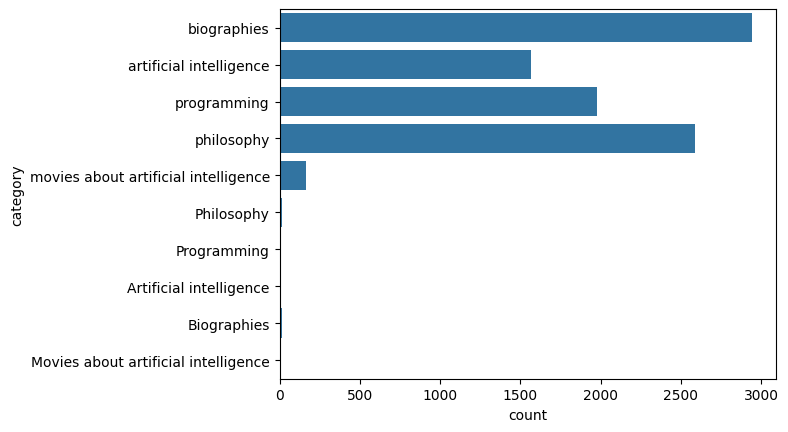

In [146]:
ax = sns.countplot(data['category'],label="Count")

## 2.PIE CHART

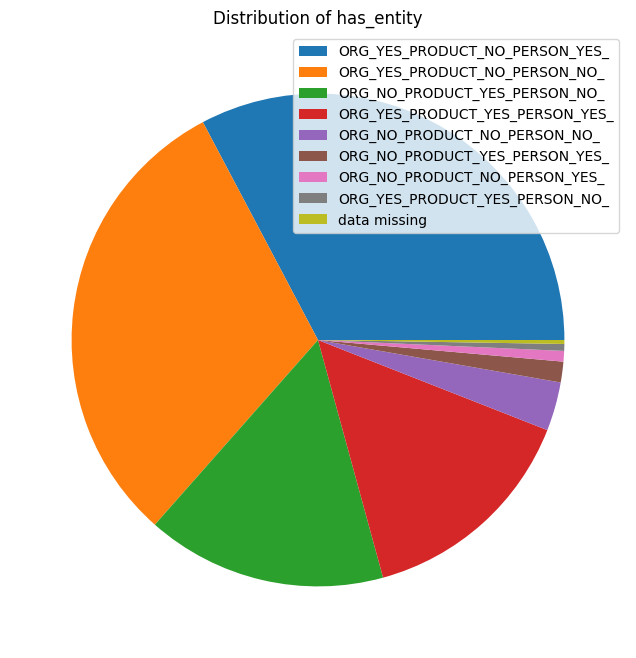

In [147]:
plt.figure(figsize = (15,8))
plt.pie(data['has_entity'].value_counts())
plt.title('Distribution of has_entity')
plt.legend(data['has_entity'].unique(),loc='upper right')
plt.show()


## 3.NORMAL GRAPH

<ipython-input-148-44d6a556eb94>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['lexicon_count'],kde=True)


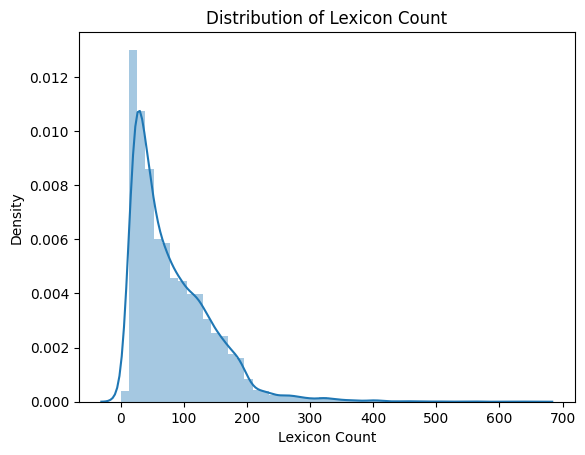

In [148]:
sns.distplot(data['lexicon_count'],kde=True)
plt.title('Distribution of Lexicon Count')
plt.xlabel('Lexicon Count')
plt.ylabel('Density')
plt.show()


#DATA CLEANING

## 2.1 REMOVE DUPLICATES

In [149]:
#deleting duplicate data
new_data=data.drop_duplicates()
duplicates_rows=new_data.duplicated()
print(duplicates_rows.sum())

0


## 2.2 REMOVE MISSING VALUES

##**OBSERVATIONS:**

1. has_entity has data with entry "data missing"
2. category has nan value which are dropped in new_data.
3. diificult_words's null is filled by median



In [150]:
new_data=new_data.dropna(subset=['category'])
new_data.isna().sum()

,0
paragraph,0
has_entity,0
lexicon_count,0
difficult_words,18
last_editor_gender,0
category,0
text_clarity,9028


In [151]:
new_data['difficult_words']=new_data['difficult_words'].fillna(new_data['difficult_words'].median())
new_data.isna().sum()

,0
paragraph,0
has_entity,0
lexicon_count,0
difficult_words,0
last_editor_gender,0
category,0
text_clarity,9028


In [152]:
# Filter the DataFrame to exclude rows where 'has_entity' is "data missing"
new_data = new_data[new_data['has_entity'] != "data missing"]
new_data['has_entity'].value_counts()

,count
has_entity,
ORG_YES_PRODUCT_NO_PERSON_YES_,2968
ORG_NO_PRODUCT_NO_PERSON_NO_,2755
ORG_YES_PRODUCT_NO_PERSON_NO_,1433
ORG_NO_PRODUCT_NO_PERSON_YES_,1339
ORG_YES_PRODUCT_YES_PERSON_YES_,291
ORG_YES_PRODUCT_YES_PERSON_NO_,122
ORG_NO_PRODUCT_YES_PERSON_YES_,63
ORG_NO_PRODUCT_YES_PERSON_NO_,42


## 2.3 CASE SENSITIVE ENTRIES
category has some common case sensitive entries

##**OBSERVATIONS:**


1. artifical intelligence=Artificial intelligence
2. biographies=Biographies
3. philosophy=Philosophy
4. programming=Programming
5. movies about artificial intelligence=Movies about artificial intelligence

In [153]:
# GROUPING THEM ACCORDING TO FEATURE
a1=new_data['category'].value_counts().index
for i in range(0,9):
 new_data.loc[new_data['category']==a1[i],'category'] = a1[i].capitalize()
new_data['category'].value_counts()

,count
category,
Biographies,2883
Philosophy,2502
Programming,1937
Artificial intelligence,1529
Movies about artificial intelligence,162


## 2.4 OUTLIERS

23


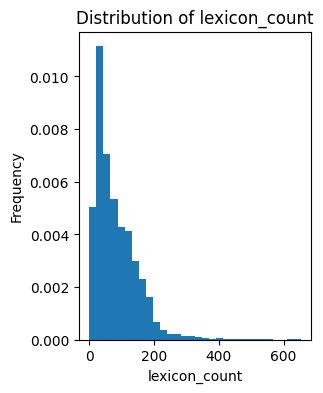

15


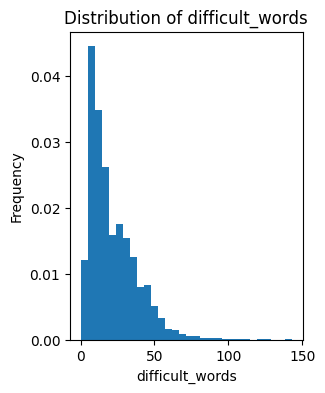

In [154]:
for i in a:
  outliers=[]
  d=new_data[i].astype(float)

  threshold=5
  mean =np.mean (d)
  std =np.std(d)

  for j in d:
    z_score= (j - mean)/ std
    if np.abs(z_score) >threshold:
      outliers.append(j)

  print(len(outliers))

  plt.figure(figsize=(3, 4))
  plt.hist(d, bins=30, density=True)
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {i}")
  plt.show()

In [155]:
n_data=new_data.copy()


## 2.5 ENCODING EVERY CATEGORICAL FEATURES .
Paragraph has to be converted into token in next coming steps after encoding categorical features.

In [156]:
from sklearn.preprocessing import LabelEncoder
encoding_variable=["last_editor_gender","category",'has_entity',"text_clarity"]
for i in encoding_variable:
  print(i)
  lblencode = LabelEncoder()
  new_data[i]= lblencode.fit_transform(new_data[i])
new_data.describe()

last_editor_gender
category
has_entity
text_clarity


,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
count,9013.000000,9013.000000,9013.000000,9013.000000,9013.000000,9013.000000
mean,2.768557,82.183846,21.563076,0.890935,2.048264,1.998447
std,2.326281,63.463065,16.301392,1.320390,1.460685,0.051582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,9.000000,0.000000,1.000000,2.000000
50%,4.000000,64.000000,17.000000,0.000000,2.000000,2.000000
75%,5.000000,117.000000,30.000000,3.000000,3.000000,2.000000
max,7.000000,653.000000,143.000000,3.000000,4.000000,2.000000


In [157]:
a = ['has_entity', 'last_editor_gender', 'category', 'text_clarity']

for i in a:
    print("\n")
    print("before label encoder",":-",n_data[i].value_counts())
    print("after label encoder",":-",new_data[i].value_counts())



before label encoder :- has_entity
ORG_YES_PRODUCT_NO_PERSON_YES_     2968
ORG_NO_PRODUCT_NO_PERSON_NO_       2755
ORG_YES_PRODUCT_NO_PERSON_NO_      1433
ORG_NO_PRODUCT_NO_PERSON_YES_      1339
ORG_YES_PRODUCT_YES_PERSON_YES_     291
ORG_YES_PRODUCT_YES_PERSON_NO_      122
ORG_NO_PRODUCT_YES_PERSON_YES_       63
ORG_NO_PRODUCT_YES_PERSON_NO_        42
Name: count, dtype: int64
after label encoder :- has_entity
5    2968
0    2755
4    1433
1    1339
7     291
6     122
3      63
2      42
Name: count, dtype: int64


before label encoder :- last_editor_gender
man                  6016
woman                2385
non-binary            349
prefer_not_to_say     263
Name: count, dtype: int64
after label encoder :- last_editor_gender
0    6016
3    2385
1     349
2     263
Name: count, dtype: int64


before label encoder :- category
Biographies                             2883
Philosophy                              2502
Programming                             1937
Artificial intelligence 

In [158]:
print("data information:-","\n")
print(new_data.info())
print("\n")
print("data shape:-","\n",new_data.shape)

data information:- 

<class 'pandas.core.frame.DataFrame'>
Index: 9013 entries, 428209002237 to 109126000894
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   paragraph           9013 non-null   object 
 1   has_entity          9013 non-null   int64  
 2   lexicon_count       9013 non-null   int64  
 3   difficult_words     9013 non-null   float64
 4   last_editor_gender  9013 non-null   int64  
 5   category            9013 non-null   int64  
 6   text_clarity        9013 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 563.3+ KB
None


data shape:- 
 (9013, 7)


# PARAGRAPH IS CHANGED INTO TOKENS AND VECTORS

 A very basic definition of a word embedding is a real number, vector representation of a word. Typically, these days, words with similar meaning will have vector representations that are close together in the embedding space (though this hasn’t always been the case).

Word embedding is a dense representation of words in the form of numeric vectors. It can be learned using a variety of language models. The word embedding representation is able to reveal many hidden relationships between words. For example, vector(“cat”) - vector(“kitten”) is similar to vector(“dog”) - vector(“puppy”). This post introduces several models for learning word embedding and how their loss functions are designed for the purpose.

## 3.1 EXTRACTING IMPORTANT WORDS
REMOVING STOP WORDS AND PUNCTUATIONS
AFTER THAT LEMMATIZE IMPORTANT WORDS

In [159]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [160]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a function that takes a sentence as input and returns a list of lemmatized words
def lemmatize_sentence(sentence):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)

    # Download the NLTK stopword list if it hasn't already been downloaded
    if not nltk.corpus.stopwords.words('english'):
        nltk.download('stopwords')

    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word not in string.punctuation]

    # Lemmatize the remaining words
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in filtered_words]

    # Join the lemmatized words back into a sentence
    return " ".join(lemmatized_words)

#usage
for i,sentence in enumerate(new_data['paragraph']):
  new_data['paragraph'].iloc()[i]=lemmatize_sentence(sentence)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_data['paragraph'].iloc()[i]=lemmatize_sentence(sentence)
<ipython-input-160-a87277130b0d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['paragraph'].iloc()[i]=lemmatize_sentence(sentence)
<ipython-input-160-a87277130b0d>:29: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values

In [161]:
new_data['paragraph'][0:3]

,paragraph
par_id,
428209002237,ramsay born glasgow 2 october 1852 he nephew g...
564218010072,it widely estimated least last generation prog...
291401001672,he went win royal medal royal society 1971 cop...


## 3.2 CONVERTING INTO VECTORS BY USING TFIDF METHOD

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer() # Create the TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(new_data['paragraph'])
feature_names = vectorizer.get_feature_names_out()
tfidf_values = {}

for doc_index, doc in enumerate(new_data['paragraph']):
	feature_index = tfidf_matrix[doc_index, :].nonzero()[1]
	tfidf_doc_values = zip(feature_index, [tfidf_matrix[doc_index, x] for x in feature_index])
	tfidf_values[doc_index] = {feature_names[i]: value for i, value in tfidf_doc_values}
#let's print
for doc_index, values in tfidf_values.items():
  print(f"Document {doc_index + 1}:")
  if doc_index>3:
    break;
  for word, tfidf_value in values.items():
    print(f"{word}: {tfidf_value}")
    print("\n")



Document 1:
ramsay: 0.37002794656529014


born: 0.12570495549010463


glasgow: 0.49365859295693476


october: 0.12798445090280258


1852: 0.17732475040423237


he: 0.14792340039612892


nephew: 0.1835600149799951


geologist: 0.18655610271405015


sir: 0.12470728467151362


andrew: 0.16082366114172658


his: 0.20662902460735666


father: 0.12429140600481278


william: 0.12347950692086693


sr: 0.21150579498318076


civil: 0.1560897132163449


engineer: 0.1560897132163449


mother: 0.14348255273154958


catherine: 0.18655610271405015


robertson: 0.21614357135666296


studied: 0.13683120334424947


academy: 0.1386990032073945


university: 0.20520253796878027


tubingen: 0.22913761907395283


germany: 0.14975032510110092


Document 2:
civil: 0.22955517341860113


it: 0.03887119124071405


widely: 0.06371278632764918


estimated: 0.08403769823328122


least: 0.06371278632764918


last: 0.061838780730845214


generation: 0.06591909639370368


program: 0.09570501353713678


resource: 0.073

In [163]:
print(tfidf_values[3])
#dictionary type
print(tfidf_values[2])

{'the': 0.051280885472285515, 'net': 0.1471979630811444, 'change': 0.23052369811050188, 'altered': 0.17925085684637307, 'many': 0.08610059420173184, 'underlying': 0.1521445458941724, 'assumption': 0.15253712827302826, 'right': 0.12177715934354197, 'thing': 0.10679625254593622, 'respect': 0.1502668033985694, 'performance': 0.13742298984917728, 'maintainability': 0.22422916328850667, 'some': 0.11526184905525094, 'function': 0.09997296201250566, 'library': 0.12751499370477962, 'longer': 0.14416933175758692, 'exist': 0.12606185871625422, 'others': 0.11303994544428159, 'available': 0.24884000909478418, 'efficient': 0.15459531815013125, 'native': 0.16257053228671672, 'alternative': 0.14416933175758692, 'even': 0.10511586883798484, 'compile': 0.16257053228671672, 'converted': 0.16996788735570356, 'visual': 0.13551740366234405, 'basic': 0.11526184905525094, 'application': 0.22540320622192356, 'require': 0.14504106426770588, 'level': 0.11462012047550714, 'refactoring': 0.2420525047500378, 'take

## 3.3 CHANGING VECTORISED PARAGRAPH INTO DATAFRAME WHOSE COLUMNS ARE WORDS USED IN PARAGRAPH

In [164]:
import pandas as pd
df = pd.DataFrame(tfidf_values).transpose()
df = df.set_index(new_data.index)

In [165]:
df['has_entity'] = new_data['has_entity']

In [166]:
df = df.fillna(0)

# DATA SPLITTING

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(df[:5000],new_data['category'][:5000], test_size=0.3, random_state=42,shuffle=True)

In [169]:
y_train.value_counts()

,count
category,
1,1100
3,1020
4,728
0,591
2,61


In [170]:
# Find all missing values in columns
missing_values = df['has_entity'].isna().sum()

# Print the result
print(missing_values)

0


In [171]:
print("shape of X_train :-",X_train.shape)
print("shape of y_train :-",y_train.shape)
print("shape of X_test :-",X_test.shape)
print("shape of y_test :-",y_test.shape)

shape of X_train :- (3500, 31921)
shape of y_train :- (3500,)
shape of X_test :- (1500, 31921)
shape of y_test :- (1500,)


# FEATURE SCALING

In [172]:

from sklearn.preprocessing import StandardScaler

# Assuming X_train is your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain the scaled data

In [173]:
X_train.shape

(3500, 31921)

In [174]:
y_test.unique()

array([3, 1, 4, 0, 2])

# deep learniing -ARTIFICIAL NEURAL NETWORK

In [175]:
import tensorflow as tf

In [176]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [177]:
# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units =32 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 31921))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [178]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 32)                  │       1,021,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,023,269 (3.90 MB)

 Trainable params: 1,023,269 (3.90 MB)

 Non-trainable params: 0 (0.00 B)

In [179]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,# minimium amount of change to count as an improvement
    patience=20,# how many epochs to wait before stopping
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [180]:
# Create a DataFrame and apply one-hot encoding
y_train_= pd.get_dummies(y_train, prefix='class')
y_train_.head(3)

,class_0,class_1,class_2,class_3,class_4
par_id,,,,,
1017228012809,True,False,False,False,False
1006039003215,False,False,False,True,False
1051055013051,False,False,False,True,False


In [181]:
model_history=model.fit(X_train,y_train_,batch_size=50,epochs=100,validation_split=0.3,callbacks=early_stopping)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.2833 - loss: 1.6091 - val_accuracy: 0.3190 - val_loss: 1.6078
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3101 - loss: 1.6074 - val_accuracy: 0.3190 - val_loss: 1.6059
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3167 - loss: 1.6057 - val_accuracy: 0.3190 - val_loss: 1.6040
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3136 - loss: 1.6036 - val_accuracy: 0.3190 - val_loss: 1.6017
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3049 - loss: 1.6011 - val_accuracy: 0.3190 - val_loss: 1.5985
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3041 - loss: 1.5982 - val_accuracy: 0.3190 - val_loss: 1.5931
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3107 - loss: 1.5912 - val_accuracy: 0.3190 - val_loss: 1.5819
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3032 - loss: 1.5795 - val_accuracy: 0.

In [182]:
y_test_= pd.get_dummies(y_test, prefix='class')
y_test_.head(3)

,class_0,class_1,class_2,class_3,class_4
par_id,,,,,
7438004003,False,False,False,True,False
659174010817,False,True,False,False,False
659505002711,False,False,False,False,True


In [199]:
y_pred = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [204]:
# prompt: in y_pred find max pe
y_pred = np.argmax(y_pred, axis=1)

In [205]:
y_pred

array([3, 3, 4, ..., 1, 1, 1])

In [185]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)

cm

array([[  0,   3,   0,  51, 188],
       [  0, 474,   0,  28,   3],
       [  0,   3,   0,  18,   5],
       [  0,  63,   0, 293,  43],
       [  0,   1,   0,  44, 283]])

In [187]:
from sklearn.metrics import classification_report

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
           1       0.87      0.94      0.90       505
           2       0.00      0.00      0.00        26
           3       0.68      0.73      0.70       399
           4       0.54      0.86      0.67       328

    accuracy                           0.70      1500
   macro avg       0.42      0.51      0.45      1500
weighted avg       0.59      0.70      0.64      1500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


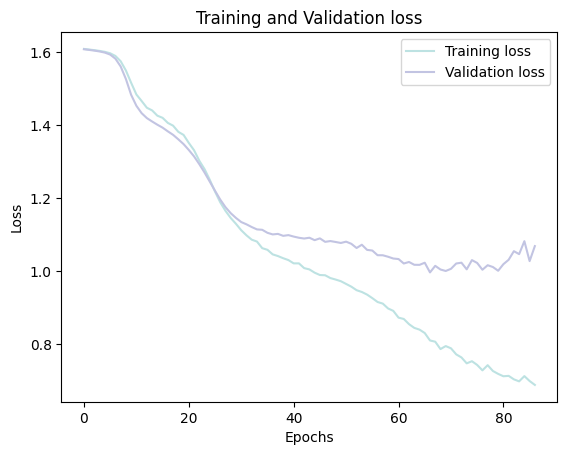

In [189]:
history_df = pd.DataFrame(model_history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()


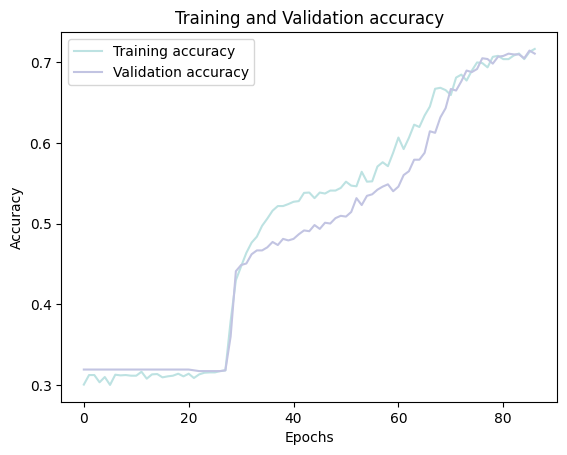

In [190]:
history_df = pd.DataFrame(model_history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# MODEL1 :-GAUSSIAN NAIVE BAYES MODEL

In [206]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [207]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)

## ACCURACY,PRECISION,FI SCORE AND BALANCED ACCURACY

In [208]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score


precision = precision_score(y_test, y_pred1,average='macro')
print(f"Precision: ",precision)
f1 = f1_score(y_test, y_pred1, average='weighted')
print(f'F1 Score: {f1}')
balanced_accuracy = balanced_accuracy_score(y_test, y_pred1)
print("Balanced accuracy:", balanced_accuracy)

Precision:  0.8409192183300667
F1 Score: 0.8298995328679886
Balanced accuracy: 0.8039273892340842


In [209]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       242
           1       0.82      0.92      0.87       505
           2       0.87      0.77      0.82        26
           3       0.80      0.82      0.81       399
           4       0.94      0.79      0.86       328

    accuracy                           0.83      1500
   macro avg       0.84      0.80      0.82      1500
weighted avg       0.83      0.83      0.83      1500



#model2:- Multinomial NAIVE BAYES

In [210]:
# Initialize the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train, y_train)

# Make predictions
y_pred2 = mnb.predict(X_test)

# Evaluate the model

print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.95      0.30      0.46       242
           1       0.55      0.95      0.70       505
           2       0.00      0.00      0.00        26
           3       0.77      0.71      0.74       399
           4       0.97      0.54      0.70       328

    accuracy                           0.68      1500
   macro avg       0.65      0.50      0.52      1500
weighted avg       0.76      0.68      0.66      1500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#model3:-Logistic Regression

In [211]:
from sklearn.linear_model import LogisticRegression

In [212]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred3 = model.predict(X_test)

# Evaluate the model

precision = precision_score(y_test, y_pred3, average='macro')
print(f"Precision: ", precision)

f1 = f1_score(y_test, y_pred3, average='weighted')
print(f'F1 Score: {f1}')

balanced_accuracy = balanced_accuracy_score(y_test, y_pred3)
print("Balanced accuracy:", balanced_accuracy)

print(classification_report(y_test, y_pred3))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision:  0.9124298108326141
F1 Score: 0.8770086275413815
Balanced accuracy: 0.7685680956246627
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       242
           1       0.87      0.92      0.89       505
           2       1.00      0.35      0.51        26
           3       0.82      0.94      0.87       399
           4       0.97      0.88      0.92       328

    accuracy                           0.88      1500
   macro avg       0.91      0.77      0.81      1500
weighted avg       0.89      0.88      0.88      1500



# CONFUSION MATRIX

In [213]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred3)
cm1 = confusion_matrix(y_test,y_pred1)
cm2 = confusion_matrix(y_test,y_pred2)

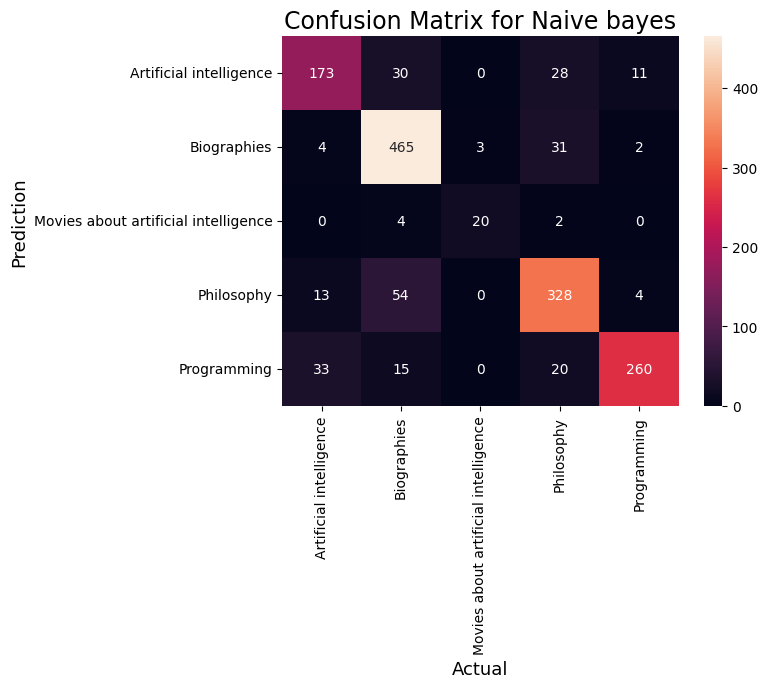

In [214]:
sns.heatmap(cm1,
annot=True,
fmt='g',xticklabels=['Artificial intelligence', 'Biographies','Movies about artificial intelligence', 'Philosophy', 'Programming'],
yticklabels=['Artificial intelligence', 'Biographies','Movies about artificial intelligence', 'Philosophy', 'Programming'],

)
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix for Naive bayes', fontsize=17)
plt.show()

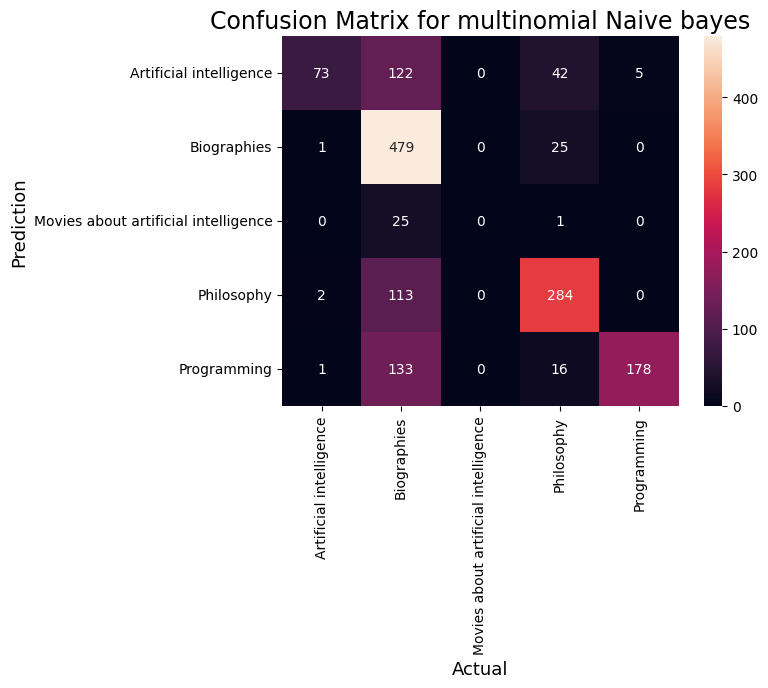

In [215]:
sns.heatmap(cm2,
annot=True,
fmt='g',xticklabels=['Artificial intelligence', 'Biographies','Movies about artificial intelligence', 'Philosophy', 'Programming'],
yticklabels=['Artificial intelligence', 'Biographies','Movies about artificial intelligence', 'Philosophy', 'Programming'],

)
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix for multinomial Naive bayes', fontsize=17)
plt.show()

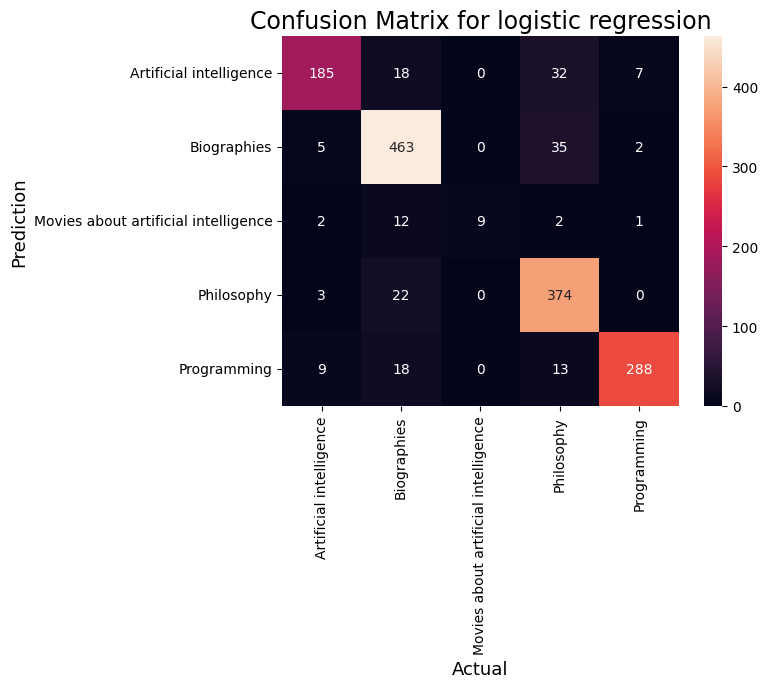

In [216]:
sns.heatmap(cm,
annot=True,
fmt='g',xticklabels=['Artificial intelligence', 'Biographies','Movies about artificial intelligence', 'Philosophy', 'Programming'],
yticklabels=['Artificial intelligence', 'Biographies','Movies about artificial intelligence', 'Philosophy', 'Programming'],

)
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix for logistic regression', fontsize=17)
plt.show()


#task 2

In [ ]:
# Drop 'paragraph' from new_data
new_data = new_data.drop('paragraph', axis=1)

# Drop 'has_entity' from df
df = df.drop('has_entity', axis=1)

# Concatenate new_data and df
new_data = pd.concat([new_data, df], axis=1)

# Verify the changes
print(new_data.head(1))


In [ ]:
# Filter the DataFrame to get rows where 'text_clarity' is not 2 as after encoding 2 represents missing values.
filtered_data = new_data[new_data['text_clarity'] != 2]

# Print the filtered data
print(len(filtered_data))

In [ ]:
new_data['text_clarity'] = new_data['text_clarity'].replace(2, None)
# Count missing values
missing_values = new_data['text_clarity'].isna().sum()
print(missing_values)


In [ ]:
# Assuming 'text_clarity' is the target variable
X_train = filtered_data.drop('text_clarity', axis=1)
y_train = filtered_data['text_clarity']

In [ ]:
# Get the indices of the missing values in 'text_clarity'
missing_indices = new_data[new_data['text_clarity'].isna()].index

# Select the first 100 missing indices
top_100_missing_indices = missing_indices[:100]

# Extract the corresponding rows from 'new_data' to form X_test
X_test = new_data.loc[top_100_missing_indices].drop('text_clarity', axis=1)

In [ ]:
X_test.head(3)

##  1.1 labelling a subset of the data

In [ ]:

# Initialize the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
label_counts = np.bincount(y_pred)

# Create a bar plot
plt.bar(['Clear', 'Not Clear Enough'], label_counts)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels')
plt.show()


In [ ]:
# Fill the missing values in 'text_clarity' with the predicted values
new_data.loc[top_100_missing_indices, 'text_clarity'] = y_pred

In [ ]:
new_data['text_clarity'].value_counts()

## 1.2 machine learning algorithm to predict these labels

###data splitting in 80-20 percentage



In [ ]:

# Assuming 'text_clarity' is the target variable and you want to use the top 100 rows as training data and test
X_train = new_data.drop('text_clarity', axis=1).head(80)
y_train = new_data['text_clarity'].head(80)

# Rest of the data can be used for testing (adjust as needed)
X_test = new_data.drop('text_clarity', axis=1).iloc[80:100]
y_test = new_data['text_clarity'].iloc[80:100]


# Now one can use X_train, y_train, X_test, and y_test for training and evaluating your model


### Gaussian Naves Bayes

In [ ]:
# Convert y_train to a numerical dtype (e.g., int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred_nb = Model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_nb))

In [ ]:
unique_values, counts = np.unique(y_pred_nb, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

### Support Vector Machine

In [ ]:
 ### Support Vector Machine

from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svm))


In [ ]:
# Create a scatter plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', marker='o')
plt.scatter(range(len(y_pred_svm)), y_pred_svm, color='red', label='Predicted', marker='x')
plt.xlabel('Data Point Index')
plt.ylabel('Text Clarity')
plt.title('Actual vs. Predicted Text Clarity (SVM)')
plt.legend()
plt.show()


#preparing data to download

In [ ]:
d = data['paragraph'].head(100)

In [ ]:
# prompt: drop all column from new_ data except has_entity	lexicon_count	difficult_words	last_editor_gender	category	text_clarity

new_data = new_data[['has_entity', 'lexicon_count', 'difficult_words', 'last_editor_gender', 'text_clarity','category']]
print(new_data.head())


In [ ]:
# Drop the second to last column as this represents paragraph category
new_data = new_data.iloc[:, :-1]

print(new_data.head())


In [ ]:
new_data.head(3)

In [ ]:
#
# Concatenate use_data with the subset of new_data
use_data = pd.concat([d, new_data], axis=1)

# Verify the changes
print(use_data.head(1))


In [ ]:
use_data.head(3)

## Changing labels in original texts

In [ ]:
# Create a dictionary to map old values to new values
value_mapping1 = {
    0: 'Artificial intelligence',
    1: 'Biographies',
    2: 'Movies about artificial intelligence',
    3: 'Philosophy',
    4: 'Programming'
}
value_mapping2 = {
    0: 'man',
    1: 'non-binary',
    2: 'prefer_not_to_say',
    3: 'woman'
}
value_mapping3 = {
    0: 'ORG_YES_PRODUCT_NO_PERSON_YES_',
    1: 'ORG_NO_PRODUCT_NO_PERSON_NO_',
    2: 'ORG_YES_PRODUCT_NO_PERSON_NO_',
    3: 'ORG_NO_PRODUCT_NO_PERSON_YES_',
    4: 'ORG_YES_PRODUCT_YES_PERSON_YES_',
    5: 'ORG_YES_PRODUCT_YES_PERSON_NO_',
    6: 'ORG_NO_PRODUCT_YES_PERSON_YES_',
    7: 'ORG_NO_PRODUCT_YES_PERSON_NO_'
}

# Create a dictionary to map old values to new values
value_mapping4 = {
    0: 'clear_enough',
    1: 'not_clear_enough'
}

# Use the replace method to update the 'text_clarity' column in use_data
use_data['text_clarity'] = use_data['text_clarity'].replace(value_mapping4)

# Use the replace method to update the 'category' column
use_data['category'] = use_data['category'].replace(value_mapping1)

# Use the replace method to update the 'last_editor_gender' column
use_data['last_editor_gender'] = use_data['last_editor_gender'].replace(value_mapping2)
# Use the replace method to update the 'has_entity' column
use_data['has_entity'] = use_data['has_entity'].replace(value_mapping3)

# Verify the changes
print(use_data.head())



In [ ]:
# Verify the changes
print(use_data['text_clarity'].value_counts())


In [ ]:
import pandas as pd
from google.colab import files

use_data.to_excel('Specific_dataframe.xlsx',index=False)
files.download('Specific_dataframe.xlsx')